## FINANCIAL INCLUSION IN AFRICA ##
* The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

### IMPORT THE LIBRARIES ###

In [1]:
#dataframe manipulation
import pandas as pd
import numpy as np
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

### LOADING DATA

In [2]:
train = pd.read_csv("/kaggle/input/financial-inclusion/financial-inclusion-in-africa/Train.csv")
var_df = pd.read_csv("/kaggle/input/financial-inclusion/financial-inclusion-in-africa/VariableDefinitions.csv")
test = pd.read_csv("/kaggle/input/financial-inclusion/financial-inclusion-in-africa/Test.csv")
test['new_id'] = test['uniqueid'] + ' x ' + test['country']
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
# var_df.head()

### WE CAN KNOW OUTLIERS THROUGH THE MIN AND MAX

In [4]:
#Look at the Data, identify those outliers,
#Drop the rows with outliers if they are less than 5%,
#Fill the rows with the mean distribution
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [5]:
train.shape

(23524, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [7]:
train.isnull().sum().T

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

## EDA

### NUMERICAL EDA

/tmp/ipykernel_19/2385163320.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['age_of_respondent'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_of_respondent', ylabel='Density'>

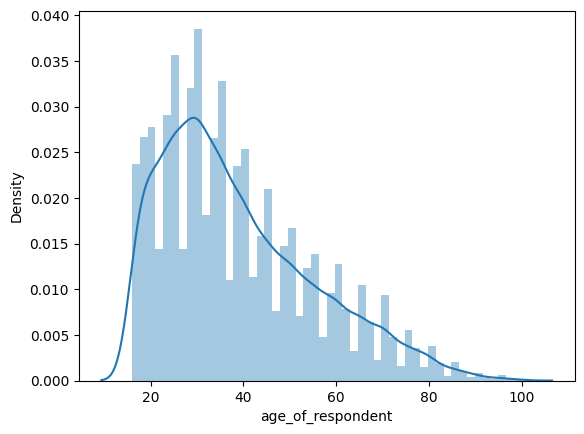

In [8]:
sns.distplot(train['age_of_respondent'])

/tmp/ipykernel_19/2063122450.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train['age_of_respondent']))
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_of_respondent', ylabel='Density'>

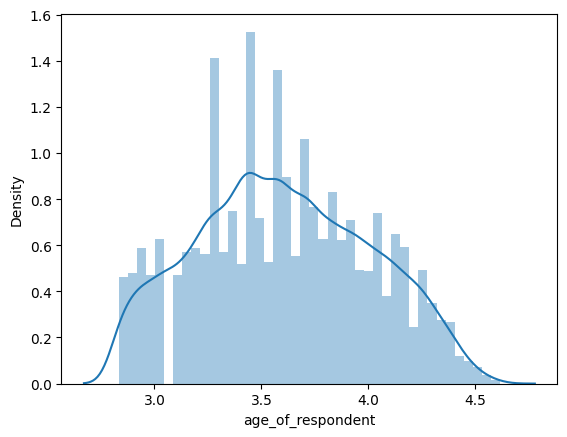

In [9]:
sns.distplot(np.log1p(train['age_of_respondent']))

CATEGORICAL EDA

Bank account

<Axes: xlabel='bank_account', ylabel='count'>

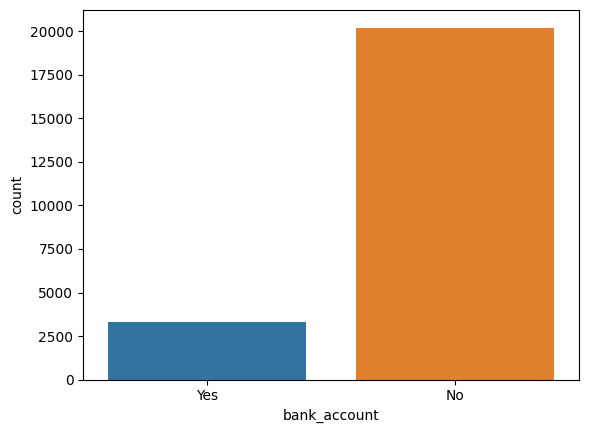

In [10]:
sns.countplot(train, x ="bank_account")

### FEATURE ENGINEERING

In [11]:
le = LabelEncoder()
for df in [train, test]:
    df['age_of_respondent'] = np.log1p(df['age_of_respondent'])
    for col in ['country', 'location_type','cellphone_access', 
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']:
        df[col] = le.fit_transform(df[col])
      
    

In [12]:
train.head

<bound method NDFrame.head of        country  year       uniqueid bank_account  location_type  \
0            0  2018     uniqueid_1          Yes              0   
1            0  2018     uniqueid_2           No              0   
2            0  2018     uniqueid_3          Yes              1   
3            0  2018     uniqueid_4           No              0   
4            0  2018     uniqueid_5           No              1   
...        ...   ...            ...          ...            ...   
23519        3  2018  uniqueid_2113           No              0   
23520        3  2018  uniqueid_2114           No              0   
23521        3  2018  uniqueid_2115           No              0   
23522        3  2018  uniqueid_2116           No              1   
23523        3  2018  uniqueid_2117           No              0   

       cellphone_access  household_size  age_of_respondent  \
0                     1               3           3.218876   
1                     0               5  

In [13]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,new_id
0,0,2018,uniqueid_6056,1,1,3,3.433987,1,1,2,3,2,uniqueid_6056 x Kenya
1,0,2018,uniqueid_6060,1,1,7,3.951244,1,1,2,5,3,uniqueid_6060 x Kenya
2,0,2018,uniqueid_6065,0,0,3,4.356709,0,4,2,0,8,uniqueid_6065 x Kenya
3,0,2018,uniqueid_6072,0,0,6,3.688879,0,1,2,2,8,uniqueid_6072 x Kenya
4,0,2018,uniqueid_6073,1,0,3,2.833213,1,0,3,3,8,uniqueid_6073 x Kenya


### TRAINING AND EVALUATION

In [14]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [15]:
x_features =['country', 'year','location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']
y_target = "bank_account"

In [16]:
train['stratify'] = train['bank_account'] + '_' + train['country'].astype('str')
train['bank_account'] = le.fit_transform(train['bank_account'])
x = train[x_features]
y = train[y_target]

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2 , stratify = train['stratify'] , random_state = 42)

In [17]:
model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
predictions = model.predict(x_valid)

print("mean absolute error: ", mean_absolute_error(predictions, y_valid))

mean absolute error:  0.13156216790648245


In [18]:
test_preds = model.predict(test[x_features])
test['preds'] = test_preds


In [19]:
sub = test[['new_id','preds']]
sub.to_csv("Financial_1.csv", index=False)